<a href="https://colab.research.google.com/github/Kim-Yeon-Jun/Dacon/blob/main/Daegu_accident/Daegu_corr_lgbm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

In [ ]:
train = pd.read_csv("/content/drive/MyDrive/Dacon/Daegu_accident/train.csv")
X = pd.read_csv("/content/drive/MyDrive/Dacon/Daegu_accident/corr_train.csv")
y = train.ECLO.copy()
test = pd.read_csv("/content/drive/MyDrive/Dacon/Daegu_accident/corr_test.csv")

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation="linear", input_dim=14, name="layer1"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(64, activation="linear", name="layer2"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(32, activation="linear", name="layer3"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(1, name="layer5"),
])

In [ ]:
lr = 0.03
optimizer = SGD(learning_rate = lr)
model.compile(optimizer='sgd', loss='mean_squared_error')

In [ ]:
estop = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

# 콜백 클래스 정의
class LossHistory(tf.keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.losses = []
        self.val_losses = []

    def on_epoch_end(self, epoch, logs={}):
        self.losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))

history_callback = LossHistory()

In [ ]:
#history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test),callbacks=[history_callback, estop])

In [ ]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test),callbacks=[history_callback])

Epoch 1/10
991/991 [==============================] - 5s 4ms/step - loss: 10.5010 - val_loss: 10.1207
Epoch 2/10
991/991 [==============================] - 5s 5ms/step - loss: 10.1872 - val_loss: 10.0929
Epoch 3/10
991/991 [==============================] - 3s 3ms/step - loss: 10.1646 - val_loss: 10.0893
Epoch 4/10
991/991 [==============================] - 3s 3ms/step - loss: 10.1420 - val_loss: 9.9016
Epoch 5/10
991/991 [==============================] - 3s 3ms/step - loss: 10.1569 - val_loss: 10.0894
Epoch 6/10
991/991 [==============================] - 4s 4ms/step - loss: 10.1371 - val_loss: 9.8870
Epoch 7/10
991/991 [==============================] - 5s 5ms/step - loss: 10.1037 - val_loss: 9.9746
Epoch 8/10
991/991 [==============================] - 3s 3ms/step - loss: 10.1094 - val_loss: 9.8436
Epoch 9/10
991/991 [==============================] - 3s 3ms/step - loss: 10.1031 - val_loss: 9.9278
Epoch 10/10
991/991 [==============================] - 3s 3ms/step - loss: 10.0917 - va

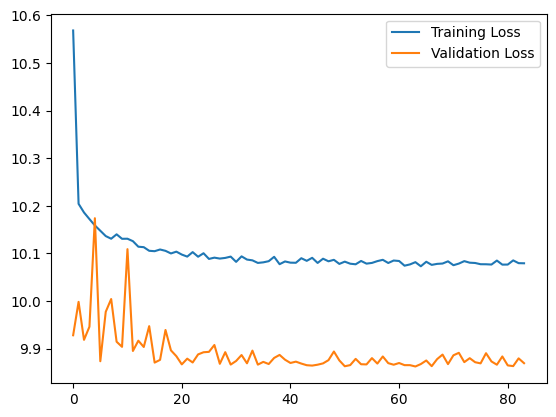

In [ ]:
plt.plot(history_callback.losses, label='Training Loss')
plt.plot(history_callback.val_losses, label='Validation Loss')
plt.legend()
plt.show()

In [ ]:
predictions = model.predict(test)
print(predictions)

343/343 [==============================] - 1s 3ms/step
[[4.4779053]
 [4.235179 ]
 [5.594164 ]
 ...
 [5.1198425]
 [5.3625693]
 [5.5947876]]


In [ ]:
result = np.round(predictions)
sub = pd.read_csv("/content/drive/MyDrive/Dacon/Daegu_accident/sample_submission.csv")
sub['ECLO'] = result
sub.head()

,ID,ECLO
0,ACCIDENT_39609,4.0
1,ACCIDENT_39610,4.0
2,ACCIDENT_39611,6.0
3,ACCIDENT_39612,5.0
4,ACCIDENT_39613,5.0


In [ ]:
sub.ECLO.value_counts()

5.0    8243
4.0    2324
6.0     337
3.0      59
Name: ECLO, dtype: int64

In [ ]:
sub.to_csv('/content/drive/MyDrive/Dacon/Daegu_accident/submission_corr_1.csv', index=False)

## 상관관계를 통한 표준화 데이터 기반

In [ ]:
train = pd.read_csv("/content/drive/MyDrive/Dacon/Daegu_accident/train.csv")
X = pd.read_csv("/content/drive/MyDrive/Dacon/Daegu_accident/strain.csv")
y = train.ECLO.copy()
test = pd.read_csv("/content/drive/MyDrive/Dacon/Daegu_accident/stest.csv")

In [ ]:
train.ECLO.value_counts()

3     18675
5      6743
6      4967
1      2578
9      1528
8      1152
4       818
10      611
12      611
11      394
15      283
7       263
13      194
2       150
14      145
16      101
18       89
17       78
20       39
19       36
21       33
24       18
23       17
22       17
26       12
27       11
25        7
28        6
30        5
31        4
34        3
32        3
37        3
33        2
35        2
36        1
40        1
65        1
56        1
47        1
57        1
45        1
52        1
74        1
39        1
66        1
Name: ECLO, dtype: int64

In [ ]:
estop = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

# 콜백 클래스 정의
class LossHistory(tf.keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.losses = []
        self.val_losses = []

    def on_epoch_end(self, epoch, logs={}):
        self.losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))

history_callback = LossHistory()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(8, activation='relu', input_dim=7, name="layer1"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(32, activation='relu', name="layer2"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(16, activation='relu', name="layer3"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(1, activation='relu', name="layer4"),
])

In [ ]:
lr = 0.000005
optimizer = SGD(learning_rate = lr)
model.compile(optimizer='sgd', loss='mean_squared_error')

In [ ]:
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test),callbacks=[history_callback, estop])

Epoch 1/100
991/991 [==============================] - 4s 3ms/step - loss: 10.5620 - val_loss: 10.5565
Epoch 2/100
991/991 [==============================] - 3s 3ms/step - loss: 9.9920 - val_loss: 10.4833
Epoch 3/100
991/991 [==============================] - 4s 4ms/step - loss: 9.9712 - val_loss: 10.4181
Epoch 4/100
991/991 [==============================] - 4s 4ms/step - loss: 9.9599 - val_loss: 10.4715
Epoch 5/100
991/991 [==============================] - 3s 3ms/step - loss: 9.9433 - val_loss: 10.6287
Epoch 6/100
991/991 [==============================] - 3s 3ms/step - loss: 9.9500 - val_loss: 10.4652
Epoch 7/100
991/991 [==============================] - 3s 3ms/step - loss: 9.9482 - val_loss: 10.5681
Epoch 8/100
991/991 [==============================] - 3s 3ms/step - loss: 9.9370 - val_loss: 10.6397
Epoch 9/100
991/991 [==============================] - 4s 4ms/step - loss: 9.9315 - val_loss: 10.4182
Epoch 10/100
991/991 [==============================] - 4s 4ms/step - loss: 9.930

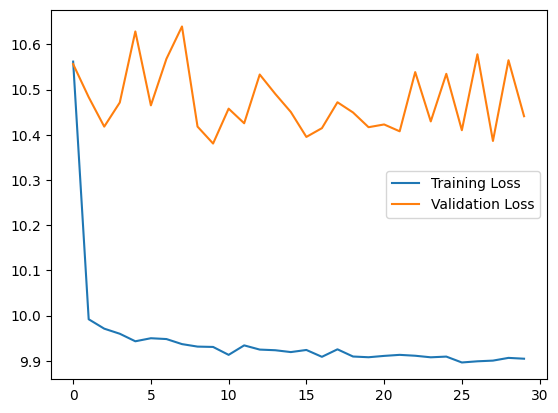

In [ ]:
plt.plot(history_callback.losses, label='Training Loss')
plt.plot(history_callback.val_losses, label='Validation Loss')
plt.legend()
plt.show()

In [ ]:
predictions = model.predict(test)
# print(predictions)

343/343 [==============================] - 1s 2ms/step


In [ ]:
result = np.round(predictions)
sub = pd.read_csv("/content/drive/MyDrive/Dacon/Daegu_accident/sample_submission.csv")
sub['ECLO'] = result
# sub.head()

In [ ]:
sub.ECLO.value_counts()

5.0    6062
4.0    3169
6.0    1659
7.0      73
Name: ECLO, dtype: int64

In [ ]:
sub.to_csv('/content/drive/MyDrive/Dacon/Daegu_accident/submission_standard_2.csv', index=False)

## Lightbgm 맛보기

In [ ]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

In [ ]:
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

params = {
    'objective': 'regression',
    'metric': 'mse',
    'boosting_type': 'gbdt',
    'num_leaves': 31,
    'learning_rate': 0.4,
    'feature_fraction': 0.9
}

In [ ]:
model = lgb.train(params, train_data, valid_sets=[train_data, test_data], num_boost_round=100)
eval = model.predict(X_test, num_iteration=model.best_iteration)

# 평가
mse = mean_squared_error(y_test, eval)
print(f'Mean Squared Error: {mse}')

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001650 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 31
[LightGBM] [Info] Number of data points in the train set: 31687, number of used features: 7
[LightGBM] [Info] Start training from score 4.742260
Mean Squared Error: 9.74705498918851


In [ ]:
# 모델 예측
y_pred = model.predict(test, num_iteration=model.best_iteration)
print(len(y_pred))

10963


In [ ]:
lgbm_result = np.round(y_pred)
lgbm_sub = pd.read_csv("/content/drive/MyDrive/Dacon/Daegu_accident/sample_submission.csv")
lgbm_sub['ECLO'] = lgbm_result
lgbm_sub.head()

,ID,ECLO
0,ACCIDENT_39609,4.0
1,ACCIDENT_39610,4.0
2,ACCIDENT_39611,5.0
3,ACCIDENT_39612,5.0
4,ACCIDENT_39613,5.0


In [ ]:
lgbm_sub.ECLO.value_counts()

5.0     6665
4.0     2731
6.0      769
3.0      439
7.0      267
8.0       39
9.0       22
2.0       20
10.0       4
1.0        3
11.0       2
14.0       1
13.0       1
Name: ECLO, dtype: int64

In [ ]:
lgbm_sub.to_csv('/content/drive/MyDrive/Dacon/Daegu_accident/submission_lgbm_2.csv', index=False)